# Intro to GeoPandas

[GeoPandas](https://geopandas.org/) adds a `geometry` data-type to pandas to allow manipulation of feature data. The `geometry` objects in the rows of a `geopandas` dataframe are `shapely` objects (`Point`, `LineString` and `Polygon`, as well as Geometry collections). Currently `geopandas` is in the process of converting its interal geometric operations such that they make use of the [PyGEOS](https://pygeos.readthedocs.io/en/latest/) module, which allows for faster, vectorized operations on arrays of geometries. For now, the use of `PyGEOS` is still experimental and we will be using the `shapely` based version of `geopandas`.  

In [1]:
import geopandas as gpd

reading in a dataframe

In [50]:
df1 = gpd.read_file('../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [51]:
for i in sorted(df1.columns):
    print(i)

ABBREV
ABBREV_LEN
ADM0_A3
ADM0_A3_AR
ADM0_A3_BD
ADM0_A3_BR
ADM0_A3_CN
ADM0_A3_DE
ADM0_A3_EG
ADM0_A3_ES
ADM0_A3_FR
ADM0_A3_GB
ADM0_A3_GR
ADM0_A3_ID
ADM0_A3_IL
ADM0_A3_IN
ADM0_A3_IT
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_MA
ADM0_A3_NL
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_PL
ADM0_A3_PS
ADM0_A3_PT
ADM0_A3_RU
ADM0_A3_SA
ADM0_A3_SE
ADM0_A3_TR
ADM0_A3_TW
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_US
ADM0_A3_VN
ADM0_A3_WB
ADM0_DIF
ADM0_DIFF
ADM0_ISO
ADM0_TLC
ADMIN
BRK_A3
BRK_DIFF
BRK_GROUP
BRK_NAME
CONTINENT
ECONOMY
FCLASS_AR
FCLASS_BD
FCLASS_BR
FCLASS_CN
FCLASS_DE
FCLASS_EG
FCLASS_ES
FCLASS_FR
FCLASS_GB
FCLASS_GR
FCLASS_ID
FCLASS_IL
FCLASS_IN
FCLASS_ISO
FCLASS_IT
FCLASS_JP
FCLASS_KO
FCLASS_MA
FCLASS_NL
FCLASS_NP
FCLASS_PK
FCLASS_PL
FCLASS_PS
FCLASS_PT
FCLASS_RU
FCLASS_SA
FCLASS_SE
FCLASS_TLC
FCLASS_TR
FCLASS_TW
FCLASS_UA
FCLASS_US
FCLASS_VN
FIPS_10
FORMAL_EN
FORMAL_FR
GDP_MD
GDP_YEAR
GEOUNIT
GEOU_DIF
GU_A3
HOMEPART
INCOME_GRP
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
LABELRANK
LABEL_X
LABEL_Y
LEVEL
LONG_LEN
MAPC

In [52]:
df1.shape

(258, 169)

In [63]:
df1.drop_duplicates(subset='ISO_A3').shape

(237, 169)

In [64]:
df = df1[['ISO_A3', 'ADMIN', 'geometry']].copy()
df.columns = ['iso', 'country', 'geometry']
df

,iso,country,geometry
0,IDN,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,MYS,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,CHL,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,BOL,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,PER,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...
253,MAC,Macao S.A.R,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,-99,Ashmore and Cartier Islands,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,-99,Bajo Nuevo Bank (Petrel Is.),"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,-99,Serranilla Bank,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


- note the `geometry` column
- contains both `POLYGON` and `MULTIPOLYGON` entries
- these are `shapely` objects!

Since this is a `pandas` dataframe, we can select rows in all the ways we already know. For example

In [59]:
df[df.iso=='CHE']

,iso,country,geometry
91,CHE,Switzerland,"POLYGON ((10.45381 46.86443, 10.44854 46.83223..."


We can convince ourselves that these are indeed `shapely` geometries

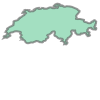

In [65]:
df[df.iso=='CHE'].geometry.values[0]

In [66]:
type(df[df.iso=='CHE'].geometry.values[0])

shapely.geometry.polygon.Polygon

`geopandas` makes use of [Matplotlib](https://matplotlib.org/), the main plotting library in python, to visualize dataframes. This is very simple

Matplotlib is building the font cache; this may take a moment.


<Axes: >

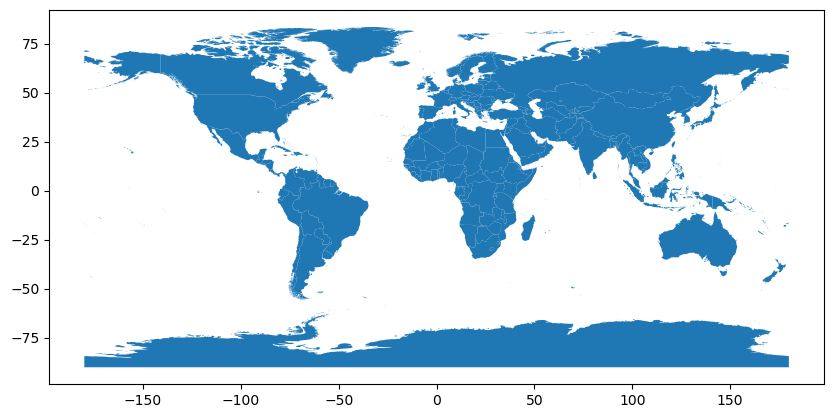

In [67]:
df.plot(figsize=(10, 6))

Since we have shapely geometries, we can calculate their areas

In [68]:
df[df.iso=='CHE'].geometry.values[0].area

4.882623254185493

In [69]:
df[df.iso=='USA'].geometry.values[0].area

1116.350128624435

In [70]:
df[df.iso=='CAN'].geometry.values[0].area

1691.8807114722586

In [71]:
df[df.iso=='CHN'].geometry.values[0].area

951.1780840917214

something is off... 
It's the projection! We are in a geographic CRS. To do meaningful area calculations, we have to project the data.

In [72]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We will cover map projections in the next section.

There is a lot you can do with geopandas. The best way to learn is to go over some examples that solve concrete problems. 